<a href="https://colab.research.google.com/github/heejvely/python-practice/blob/main/ml_XGBoost%2C_lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xgboost
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state = 156)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현률:{recall:.4f}, F1:{f1:.4f}, AUC:{roc_auc:.4f}')

In [8]:
# 사이킷런 Wrapper XGBooster 적용
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper= XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=400, eval_set = evals, eval_metric = 'logloss', verbose=True)
ws400_preds = xgb_wrapper.predict(X_test)
ws400_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494248
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [10]:
get_clf_eval(y_test, ws400_preds, ws400_preds_proba)

오차행렬
[[35  2]
 [ 1 76]]
정확도:0.9737, 정밀도:0.9744, 재현률:0.9870, F1:0.9806, AUC:0.9951


In [12]:
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate = 0.3, max_depth=3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_set = evals,eval_metric='logloss', verbose = True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.479838
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.362179
[2]	validation_0-logloss:0.290041
[3]	validation_0-logloss:0.233818
[4]	validation_0-logloss:0.199014
[5]	validation_0-logloss:0.174692
[6]	validation_0-logloss:0.155492
[7]	validation_0-logloss:0.133671
[8]	validation_0-logloss:0.124106
[9]	validation_0-logloss:0.116106
[10]	validation_0-logloss:0.107679
[11]	validation_0-logloss:0.100176
[12]	validation_0-logloss:0.097538
[13]	validation_0-logloss:0.089204
[14]	validation_0-logloss:0.092592
[15]	validation_0-logloss:0.09144
[16]	validation_0-logloss:0.090663
[17]	validation_0-logloss:0.090576
[18]	validation_0-logloss:0.088944
[19]	validation_0-logloss:0.086216
[20]	validation_0-logloss:0.086938
[21]	validation_0-logloss:0.084374
[22]	validation_0-logloss:0.080915
[23]	validation_0-logloss:0.084044
[24]	validation_0-logloss:0.082521
[25]	validation_0-logloss:0.083631
[26]	validation_0-logloss:0.0822

In [13]:
get_clf_eval(y_test, ws100_preds, ws100_preds_proba)

오차행렬
[[35  2]
 [ 3 74]]
정확도:0.9561, 정밀도:0.9737, 재현률:0.9610, F1:0.9673, AUC:0.9961


In [14]:
# 사이킷런 Wrapper XGBooster 적용
from xgboost import XGBClassifier

evals = [(X_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds= 10, eval_set = evals, eval_metric = 'logloss', verbose = True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test,ws10_preds,ws10_preds_proba)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494248
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


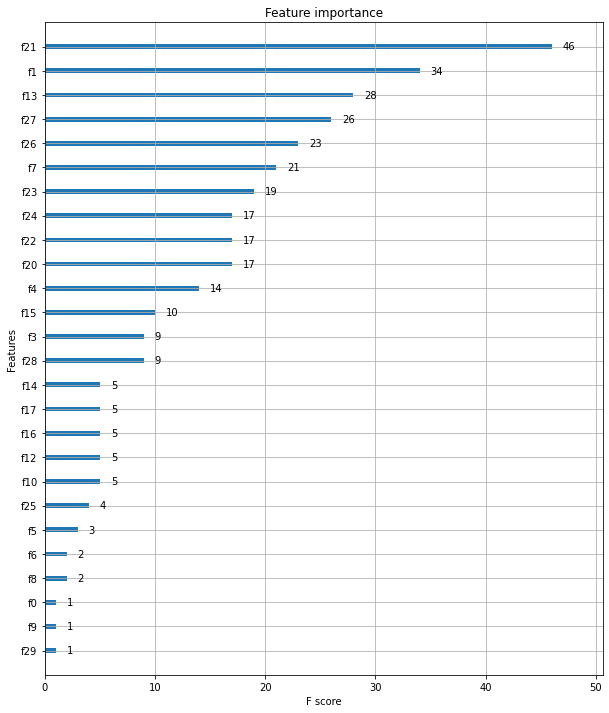

In [15]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)

In [16]:
import lightgbm
print(lightgbm.__version__)

2.2.3


In [18]:
from lightgbm import LGBMClassifier
dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(ftr,target,test_size=0.2, random_state=156)
lgbm_wrapper = LGBMClassifier(n_estimators = 400)
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='logloss',eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
preds_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.507451	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865	valid_0's bi

In [19]:
get_clf_eval(y_test, preds, preds_proba)

오차행렬
[[33  4]
 [ 2 75]]
정확도:0.9474, 정밀도:0.9494, 재현률:0.9740, F1:0.9615, AUC:0.9926


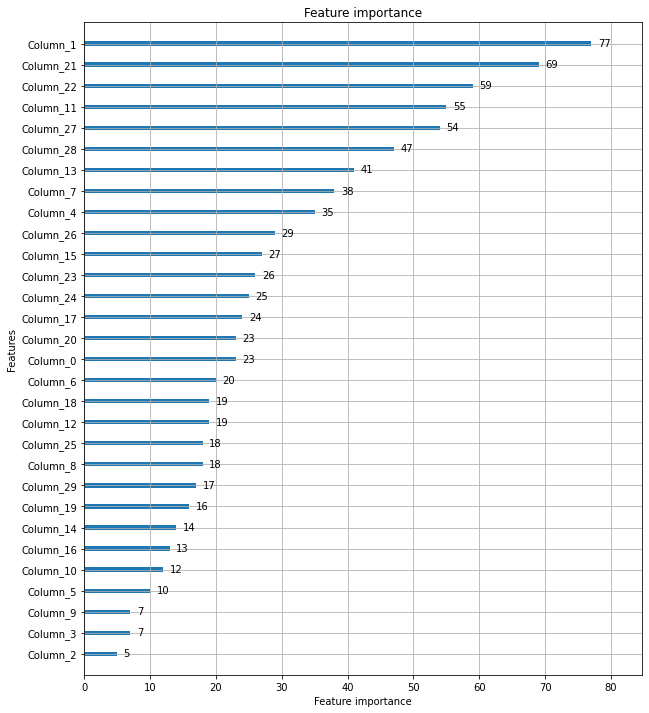

In [20]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

Q. 산탄데르 은행의 고객만족 예측 분석을 수행하세요.

* 370개의 피처로 주어진 데이터 세트
* 클래스 레이블명은 target 1이 불만, 0은 만족
* 모델의 성능 평가는 ROC_AUC

In [21]:
ts = pd.read_csv('/content/drive/MyDrive/빅분기연습/dataset/train_santander.csv')
ts.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [22]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [23]:
ts.var3.value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

In [24]:
# 이상치 최빈값으로 대체
ts.var3.replace(-999999,2,inplace=True)

In [25]:
X = ts.drop('TARGET',axis=1) # 독립변수
y = ts['TARGET'] # 종속변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=156)

In [26]:
print(X_train.shape, X_test.shape)

(60816, 370) (15204, 370)


In [28]:
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=500, learning_rate=0.1)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_set = evals, eval_metric='auc',verbose=True)
ts_preds = xgb_wrapper.predict(X_test)
ts_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-auc:0.795783
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.797536
[2]	validation_0-auc:0.80363
[3]	validation_0-auc:0.807827
[4]	validation_0-auc:0.807988
[5]	validation_0-auc:0.807519
[6]	validation_0-auc:0.80834
[7]	validation_0-auc:0.808413
[8]	validation_0-auc:0.809184
[9]	validation_0-auc:0.808329
[10]	validation_0-auc:0.810383
[11]	validation_0-auc:0.808745
[12]	validation_0-auc:0.809334
[13]	validation_0-auc:0.809288
[14]	validation_0-auc:0.809682
[15]	validation_0-auc:0.810414
[16]	validation_0-auc:0.811313
[17]	validation_0-auc:0.814341
[18]	validation_0-auc:0.815262
[19]	validation_0-auc:0.816178
[20]	validation_0-auc:0.816272
[21]	validation_0-auc:0.817822
[22]	validation_0-auc:0.818135
[23]	validation_0-auc:0.818308
[24]	validation_0-auc:0.820842
[25]	validation_0-auc:0.820778
[26]	validation_0-auc:0.820877
[27]	validation_0-auc:0.821817
[28]	validation_0-auc:0.822207
[29]	validation_0-auc:0.822977
[30]	validation_0

In [29]:
roc_auc_score(y_test, ts_preds_proba, average='macro')

0.8415052931572802

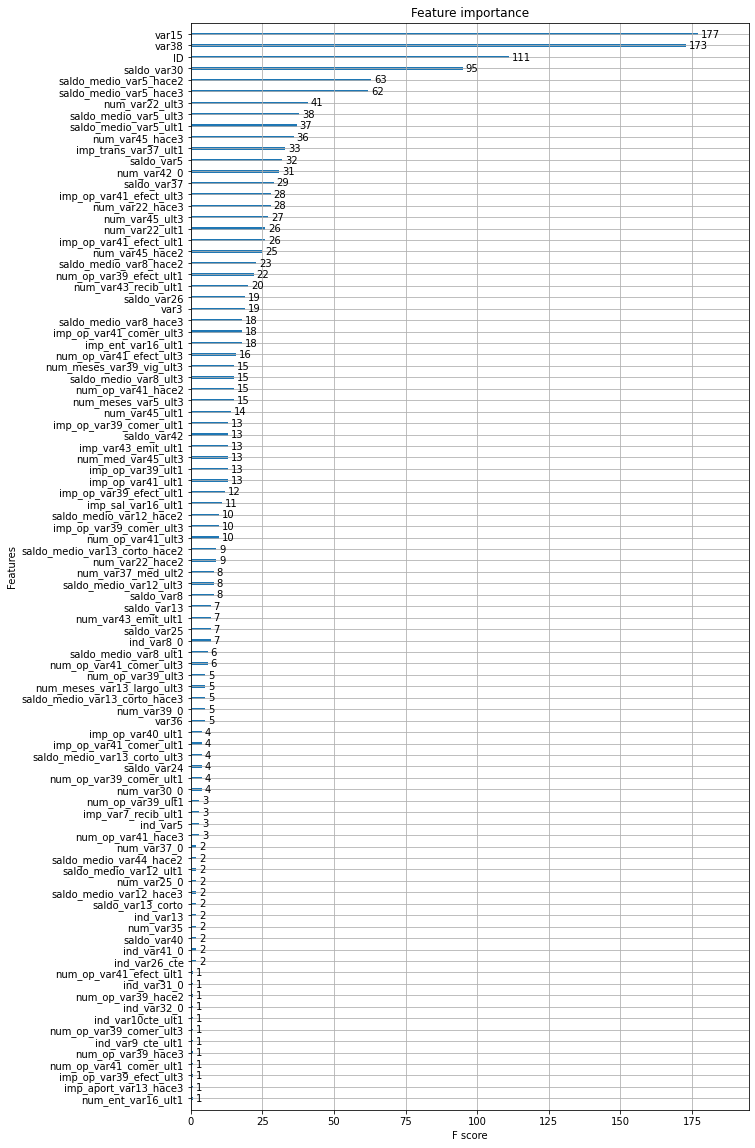

In [30]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fix, ax = plt.subplots(figsize = (10,20))
plot_importance(xgb_wrapper, ax= ax)

In [32]:
 lgbm_wrapper = LGBMClassifier(n_estimator = 500)
 evals = [(X_test, y_test)]
 lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='auc',eval_set = evals,verbose=True)
 lg_preds = lgbm_wrapper.predict(X_test)
 lg_preds_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's auc: 0.812769	valid_0's binary_logloss: 0.16076
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.815159	valid_0's binary_logloss: 0.15607
[3]	valid_0's auc: 0.820724	valid_0's binary_logloss: 0.152748
[4]	valid_0's auc: 0.822407	valid_0's binary_logloss: 0.15017
[5]	valid_0's auc: 0.824647	valid_0's binary_logloss: 0.148085
[6]	valid_0's auc: 0.826394	valid_0's binary_logloss: 0.146414
[7]	valid_0's auc: 0.827532	valid_0's binary_logloss: 0.14515
[8]	valid_0's auc: 0.827731	valid_0's binary_logloss: 0.144018
[9]	valid_0's auc: 0.829006	valid_0's binary_logloss: 0.142953
[10]	valid_0's auc: 0.830274	valid_0's binary_logloss: 0.142124
[11]	valid_0's auc: 0.830822	valid_0's binary_logloss: 0.14138
[12]	valid_0's auc: 0.832379	valid_0's binary_logloss: 0.140744
[13]	valid_0's auc: 0.833223	valid_0's binary_logloss: 0.140188
[14]	valid_0's auc: 0.834601	valid_0's binary_logloss: 0.139666
[15]	valid_0's auc: 0.83507	valid_0's binary_logloss: 0

In [33]:
roc_auc_score(y_test, lg_preds_proba, average='macro')

0.8395190483790236

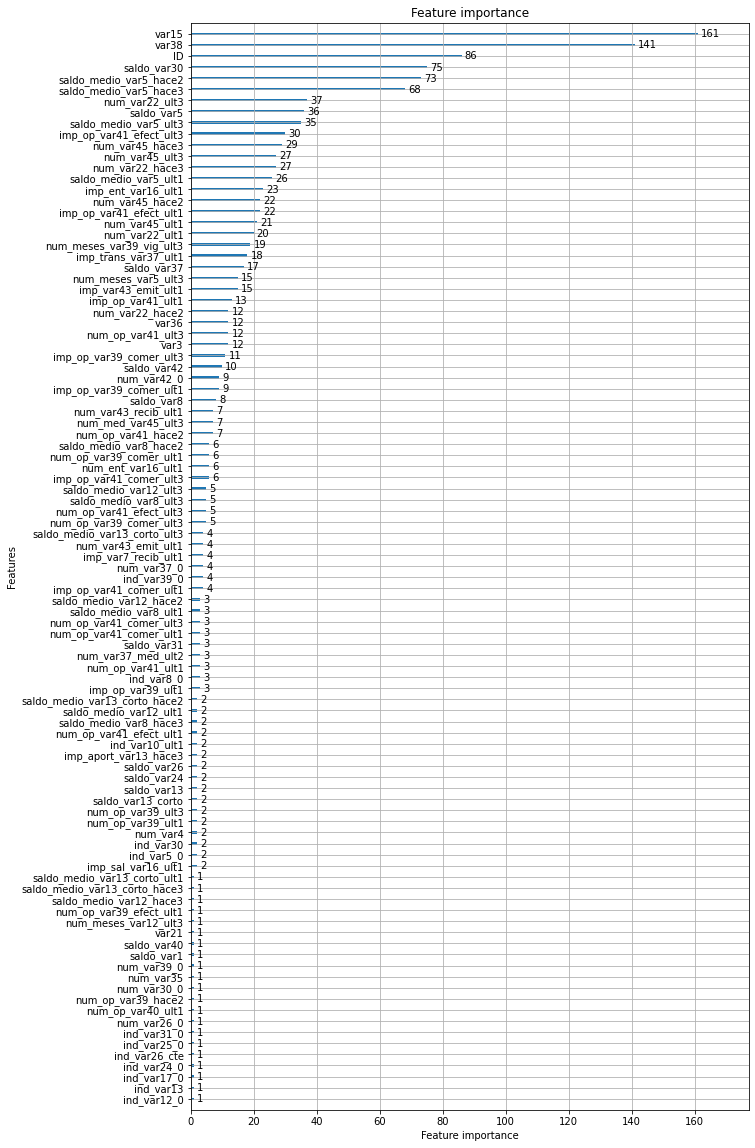

In [34]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,20))
plot_importance(lgbm_wrapper,ax=ax)

In [43]:
cust_df = pd.read_csv('/content/drive/MyDrive/빅분기연습/dataset/train_santander.csv')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.0,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [44]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

In [45]:
cust_df['var3'].replace(-9999,2,inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print(f'피처 데이터 shape {X_features.shape}')

피처 데이터 shape (76020, 369)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0, stratify=y_labels)

train_cnt = y_train.count()
test_cnt = y_test.count()
print(f'학습 세트 Shape:{X_train.shape}, 테스트 세트 Shape:{X_test.shape}')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960438
1    0.039562
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


In [47]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',eval_set=[(X_train, y_train),(X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

[0]	validation_0-auc:0.806131	validation_1-auc:0.778639
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.811867	validation_1-auc:0.784901
[2]	validation_0-auc:0.81454	validation_1-auc:0.788032
[3]	validation_0-auc:0.816373	validation_1-auc:0.790142
[4]	validation_0-auc:0.817591	validation_1-auc:0.791164
[5]	validation_0-auc:0.821018	validation_1-auc:0.794698
[6]	validation_0-auc:0.822843	validation_1-auc:0.796272
[7]	validation_0-auc:0.824045	validation_1-auc:0.796976
[8]	validation_0-auc:0.823207	validation_1-auc:0.796625
[9]	validation_0-auc:0.822984	validation_1-auc:0.796541
[10]	validation_0-auc:0.821323	validation_1-auc:0.795906
[11]	validation_0-auc:0.823286	validation_1-auc:0.796844
[12]	validation_0-auc:0.824967	validation_1-auc:0.79843
[13]	validation_0-auc:0.823987	validation_1-auc:0.797144
[14]	validation_0-auc:0.825334	validation_1-auc:0.798617

In [49]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)
params = {'max_depth':[5,7], 'min_child_weight':[1,3],'colsample_bytree':[0.5,0.75]}

gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',eval_set=[(X_train, y_train),(X_test, y_test)])

print('GridSearchCV최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average='macro')
print(f'ROC AUC:{xgb_roc_score:.4f}')

[0]	validation_0-auc:0.720655	validation_1-auc:0.691027
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.818365	validation_1-auc:0.786333
[2]	validation_0-auc:0.810289	validation_1-auc:0.779506
[3]	validation_0-auc:0.81983	validation_1-auc:0.788427
[4]	validation_0-auc:0.825581	validation_1-auc:0.792933
[5]	validation_0-auc:0.823189	validation_1-auc:0.790496
[6]	validation_0-auc:0.821652	validation_1-auc:0.789089
[7]	validation_0-auc:0.829111	validation_1-auc:0.796181
[8]	validation_0-auc:0.832907	validation_1-auc:0.801316
[9]	validation_0-auc:0.832609	validation_1-auc:0.798545
[10]	validation_0-auc:0.837461	validation_1-auc:0.80307
[11]	validation_0-auc:0.841006	validation_1-auc:0.805791
[12]	validation_0-auc:0.842523	validation_1-auc:0.807897
[13]	validation_0-auc:0.842649	validation_1-auc:0.808051
[14]	validation_0-auc:0.842022	validation_1-auc:0.806522


In [50]:
xgb_clf = XGBClassifier(n_estimators = 1000, random_State=156, learning_rate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set = [(X_train, y_train),(X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

[0]	validation_0-auc:0.828334	validation_1-auc:0.7942
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.83234	validation_1-auc:0.798632
[2]	validation_0-auc:0.834571	validation_1-auc:0.800358
[3]	validation_0-auc:0.837868	validation_1-auc:0.802824
[4]	validation_0-auc:0.840246	validation_1-auc:0.803548
[5]	validation_0-auc:0.840933	validation_1-auc:0.804425
[6]	validation_0-auc:0.84338	validation_1-auc:0.806486
[7]	validation_0-auc:0.843212	validation_1-auc:0.806684
[8]	validation_0-auc:0.842926	validation_1-auc:0.806955
[9]	validation_0-auc:0.844724	validation_1-auc:0.807889
[10]	validation_0-auc:0.845119	validation_1-auc:0.808157
[11]	validation_0-auc:0.845154	validation_1-auc:0.808126
[12]	validation_0-auc:0.844891	validation_1-auc:0.807634
[13]	validation_0-auc:0.849149	validation_1-auc:0.811759
[14]	validation_0-auc:0.849086	validation_1-auc:0.811455
[

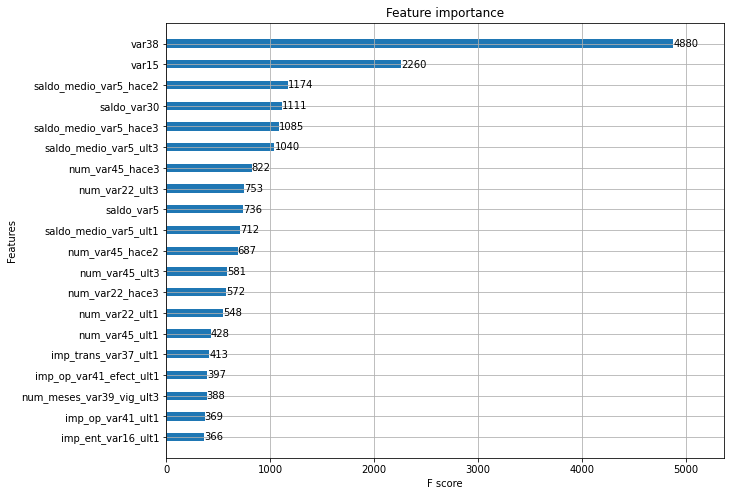

In [51]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [52]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print(f'ROC AUC:{lgbm_roc_score}')

[1]	valid_0's auc: 0.795963	valid_0's binary_logloss: 0.159288
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.802591	valid_0's binary_logloss: 0.15489
[3]	valid_0's auc: 0.803095	valid_0's binary_logloss: 0.151871
[4]	valid_0's auc: 0.804324	valid_0's binary_logloss: 0.149781
[5]	valid_0's auc: 0.808172	valid_0's binary_logloss: 0.147795
[6]	valid_0's auc: 0.80977	valid_0's binary_logloss: 0.146365
[7]	valid_0's auc: 0.813013	valid_0's binary_logloss: 0.145249
[8]	valid_0's auc: 0.81573	valid_0's binary_logloss: 0.144193
[9]	valid_0's auc: 0.815645	valid_0's binary_logloss: 0.143351
[10]	valid_0's auc: 0.816762	valid_0's binary_logloss: 0.142505
[11]	valid_0's auc: 0.8168	valid_0's binary_logloss: 0.141927
[12]	valid_0's auc: 0.818786	valid_0's binary_logloss: 0.141383
[13]	valid_0's auc: 0.819169	valid_0's binary_logloss: 0.140872
[14]	valid_0's auc: 0.819483	valid_0's binary_logloss: 0.140573
[15]	valid_0's auc: 0.820752	valid_0's binary_logloss: 

In [53]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimator=200)
params = {'num_leaves':[32,64], 'max_depth':[128, 160], 'min_child_samples':[60,100], 'subsample':[0.8,1]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',eval_set=[(X_train, y_train),(X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average='macro')
print(f'ROC AUC: {lgbm_roc_score}')

[1]	valid_0's auc: 0.823013	valid_0's binary_logloss: 0.157599	valid_1's auc: 0.790743	valid_1's binary_logloss: 0.15957
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.829507	valid_0's binary_logloss: 0.15203	valid_1's auc: 0.79822	valid_1's binary_logloss: 0.154927
[3]	valid_0's auc: 0.834674	valid_0's binary_logloss: 0.147974	valid_1's auc: 0.800682	valid_1's binary_logloss: 0.1519
[4]	valid_0's auc: 0.841586	valid_0's binary_logloss: 0.144944	valid_1's auc: 0.806748	valid_1's binary_logloss: 0.149617
[5]	valid_0's auc: 0.845466	valid_0's binary_logloss: 0.142464	valid_1's auc: 0.812166	valid_1's binary_logloss: 0.147629
[6]	valid_0's auc: 0.846831	valid_0's binary_logloss: 0.140356	valid_1's auc: 0.812302	valid_1's binary_logloss: 0.146166
[7]	valid_0's auc: 0.848919	valid_0's binary_logloss: 0.138617	valid_1's auc: 0.813475	valid_1's binary_logloss: 0.144915
[8]	valid_0's auc: 0.850955	valid_0's binary_logloss: 0.137114	valid_1's auc: 0.814566	va

In [54]:
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, subsample = 0.8,min_child_samples=100, max_depth=128)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {lgbm_roc_score}')

[1]	valid_0's auc: 0.799534	valid_0's binary_logloss: 0.15915
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.814094	valid_0's binary_logloss: 0.154444
[3]	valid_0's auc: 0.817802	valid_0's binary_logloss: 0.151183
[4]	valid_0's auc: 0.818073	valid_0's binary_logloss: 0.14885
[5]	valid_0's auc: 0.820847	valid_0's binary_logloss: 0.146766
[6]	valid_0's auc: 0.82134	valid_0's binary_logloss: 0.145253
[7]	valid_0's auc: 0.821935	valid_0's binary_logloss: 0.143971
[8]	valid_0's auc: 0.823744	valid_0's binary_logloss: 0.142828
[9]	valid_0's auc: 0.823685	valid_0's binary_logloss: 0.14198
[10]	valid_0's auc: 0.822996	valid_0's binary_logloss: 0.141363
[11]	valid_0's auc: 0.822724	valid_0's binary_logloss: 0.140794
[12]	valid_0's auc: 0.822634	valid_0's binary_logloss: 0.140341
[13]	valid_0's auc: 0.822771	valid_0's binary_logloss: 0.13994
[14]	valid_0's auc: 0.823192	valid_0's binary_logloss: 0.139619
[15]	valid_0's auc: 0.823048	valid_0's binary_logloss: 